<a href="https://colab.research.google.com/github/Zoeyyy14/C117/blob/main/C117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving C117.csv to C117.csv


In [4]:
import pandas as pd
df=pd.read_csv("C117.csv")
print(df.head(7))

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6   56    0   1       140   294    0  ...      0      1.3      1   0     2       1

[7 rows x 14 columns]


In [6]:
from sklearn.model_selection import train_test_split
Age=df["age"]
Target=df["target"]
Age_train,Age_test,Target_train,Target_test=train_test_split(Age,Target,test_size=0.25,random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X=np.reshape(Age_train.ravel(),(len(Age_train),1))
Y=np.reshape(Target_train.ravel(),(len(Target_train),1))
classifier=LogisticRegression(random_state=0)
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X_test=np.reshape(Age_train.ravel(),(len(Age_train),1))
Y_test=np.reshape(Target_train.ravel(),(len(Target_train),1))
prediction=classifier.predict(X_test)

predicted_value=[]
for i in prediction:
  if i==0:
    predicted_value.append("No")
  else:
    predicted_value.append("Yes")

actual_value=[]
for i in Y_test.ravel():
  if i==0:
    actual_value.append("No")
  else:
    actual_value.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

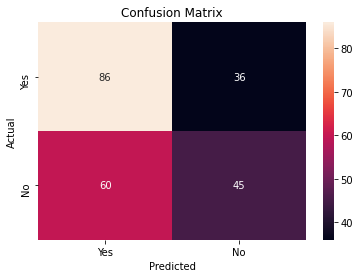

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
labels=["Yes","No"]
cm=confusion_matrix(actual_value,predicted_value,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)

In [15]:
accuracy=86+45/86+36+60+45
print(accuracy)

227.52325581395348
